<a href="https://colab.research.google.com/github/mavito/ML_Concepts/blob/main/ML_OptimizationPrinciples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimizatoin Principles in Machine Learning**



## **1. Unconstrained Optimization: Gradient Descent**

The foundational algorithm for minimizing differentiable functions is Gradient Descent. It is an iterative method that starts at a random point in the parameter space and takes successive steps proportional to the negative of the gradient of the function at the current point.

$$\theta_{t+1} = \theta_t - \gamma \nabla f(\theta_t)$$

Imagine an explorer who has been dropped by helicopter onto a vast, uneven mountain range at night.The explorer's goal is to reach the lowest point in the valley which is the bottom of the mountain to find a village (the optimal solution).
However, there is a catch: a thick fog obscures the landscape.
The explorer cannot see the village or even the terrain five feet ahead. They effectively have zero visibility of the global landscape. They cannot simply look at a map and walk to the lowest point. Instead, they must rely on local information.The explorer feels the ground beneath their feet. They can sense the slope. If the ground tilts upward to the right, they know that stepping to the left will take them lower. In this analogy:

- The Mountain Terrain: Represents the Loss Function (Error Landscape). High peaks are high error; valleys are low error.
- The Explorer's Position: Represents the model parameters $\theta$ (weights and biases).
- The Slope of the Ground: Represents the Gradient $\nabla f$. It tells the explorer which direction is "up."
- The Step: The explorer takes a step in the direction opposite to the slope (downhill).
- The Stride Length: Represents the Learning Rate $\gamma$. A cautious explorer takes tiny steps; a reckless one takes giant leaps.

By repeating this process—feeling the slope, turning downhill, and taking a step—thousands of times, the explorer eventually reaches a point where the ground is flat in all directions. They have reached a minimum.

**Implement basic gradient descent**

We wiill now optimize a simple convex function where the global minimum is known, and verify the algorithm's success.

Objective: Minimize the function $f(x) = x^2$.

Derivative: $f'(x) = 2x$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import plotly.graph_objects as go

# --- Objective Function ---
def func_quadratic(x):
    return x**2

def grad_quadratic(x):
    return 2 * x

# --- Gradient Descent ---
def gradient_descent_vanilla(start_x, learning_rate, num_iterations):
    x = start_x
    history = [x]
    gradients = [grad_quadratic(x)]

    for _ in range(num_iterations):
        gradient = grad_quadratic(x)
        x = x - learning_rate * gradient
        history.append(x)
        gradients.append(grad_quadratic(x))

    return history, gradients


# --- Configuration ---
start_position = 10.0
steps = 20

# Learning rate slider values
learning_rates = [0.02, 0.05, 0.1, 0.2]

x_axis = np.linspace(-12, 12, 400)
y_axis = func_quadratic(x_axis)

fig = go.Figure()

# Static function
fig.add_trace(go.Scatter(
    x=x_axis,
    y=y_axis,
    mode='lines',
    name='Objective Function f(x)=x²'
))

# Placeholder traces (updated by animation)
fig.add_trace(go.Scatter(
    x=[start_position],
    y=[func_quadratic(start_position)],
    mode='markers+lines',
    marker=dict(size=10, color='red'),
    line=dict(color='red', dash='dash'),
    name='Descent Path'
))

fig.add_trace(go.Scatter(
    x=[],
    y=[],
    mode='lines',
    line=dict(color='green', width=3),
    name='Gradient Direction'
))

frames = []

for lr in learning_rates:
    path, grads = gradient_descent_vanilla(start_position, lr, steps)

    for i in range(len(path)):

        current_x = path[i]
        current_y = func_quadratic(current_x)
        gradient = grads[i]

        # Arrow showing gradient direction
        arrow_x = [current_x, current_x - 0.5 * gradient]
        arrow_y = [current_y, func_quadratic(current_x - 0.5 * gradient)]

        frames.append(
            go.Frame(
                data=[
                    go.Scatter(x=x_axis, y=y_axis),
                    go.Scatter(
                        x=path[:i+1],
                        y=[func_quadratic(p) for p in path[:i+1]],
                        mode='markers+lines',
                        marker=dict(size=10, color='red'),
                        line=dict(color='red', dash='dash')
                    ),
                    go.Scatter(
                        x=arrow_x,
                        y=arrow_y,
                        mode='lines',
                        line=dict(color='green', width=3)
                    )
                ],
                name=f"lr={lr}_step={i}",
                layout=go.Layout(
                    title=f"Gradient Descent | lr={lr} | Step={i} | Gradient={gradient:.4f}"
                )
            )
        )

fig.frames = frames

# Slider steps
slider_steps = []
for frame in frames:
    slider_steps.append(
        dict(
            method="animate",
            args=[[frame.name],
                  {"mode": "immediate",
                   "frame": {"duration": 0, "redraw": True}}],
            label=frame.name
        )
    )

fig.update_layout(
    title="Gradient Descent Explorer",
    xaxis_title="Parameter x",
    yaxis_title="Cost f(x)",
    width=1000,
    height=650,
    updatemenus=[{
        "type": "buttons",
        "buttons": [
            {
                "label": "Play",
                "method": "animate",
                "args": [None,
                         {"frame": {"duration": 400, "redraw": True},
                          "fromcurrent": True}]
            },
            {
                "label": "Pause",
                "method": "animate",
                "args": [[None],
                         {"mode": "immediate",
                          "frame": {"duration": 0}}]
            }
        ]
    }],
    sliders=[{
        "steps": slider_steps,
        "active": 0
    }]
)

fig.show()

## Task 1.1: Perform the following experiments to build intuition regarding hyperparameters:

- Divergence Experiment:
  - Change the learning_rate to 1.1.
  - Run the code and observe the plot.
  - The red dots should explode outwards, moving away from zero.
  - This demonstrates "overshooting" caused by a step-size that is too large.
  
- Stagnation Experiment:
  - Change the learning_rate to 0.0001.
  - Increase steps to 20.
  - Observe that the red dots barely move from the starting position.
  - This demonstrates "vanishing updates" or slow convergence caused by a step-size that is too small.

- Non-Convex Challenge:
  - Change the objective function to f(x) = x**4 - 2*x**2 (a W-shaped curve).
  - Its derivative is 4*x**3 - 4*x.
  - Start the optimizer at x = 0.
  - Observe that the gradient is 0, so the optimizer does not move, even though $x=0$ is a local maximum (a hill), not a minimum.
  - This illustrates the danger of saddle points and local extrema.

In [ ]:
#WRITE CODE HERE

## **2. Learning Rate**

Returning to the mountain analogy, the step-size is the length of the explorer's stride.

- **Tiny Stride:**
  - If the explorer takes steps measuring only a few millimeters, they will descend safely.
  - They will never accidentally walk up the other side of the valley.
  - However, if the valley is 10 miles deep, they will die of old age before reaching the bottom.
  - This corresponds to a computationally expensive training process that might never finish.

- **Giant Leap:**
  - If the explorer can jump 1 mile at a time, they might jump from one side of the valley to the other, completely missing the village at the bottom.
  - If the jump is too strong, they might even land higher up on the opposite slope, gaining altitude (increasing loss) with every jump.
  - This corresponds to the model parameters diverging, often resulting in NaN (Not a Number) errors in the code.

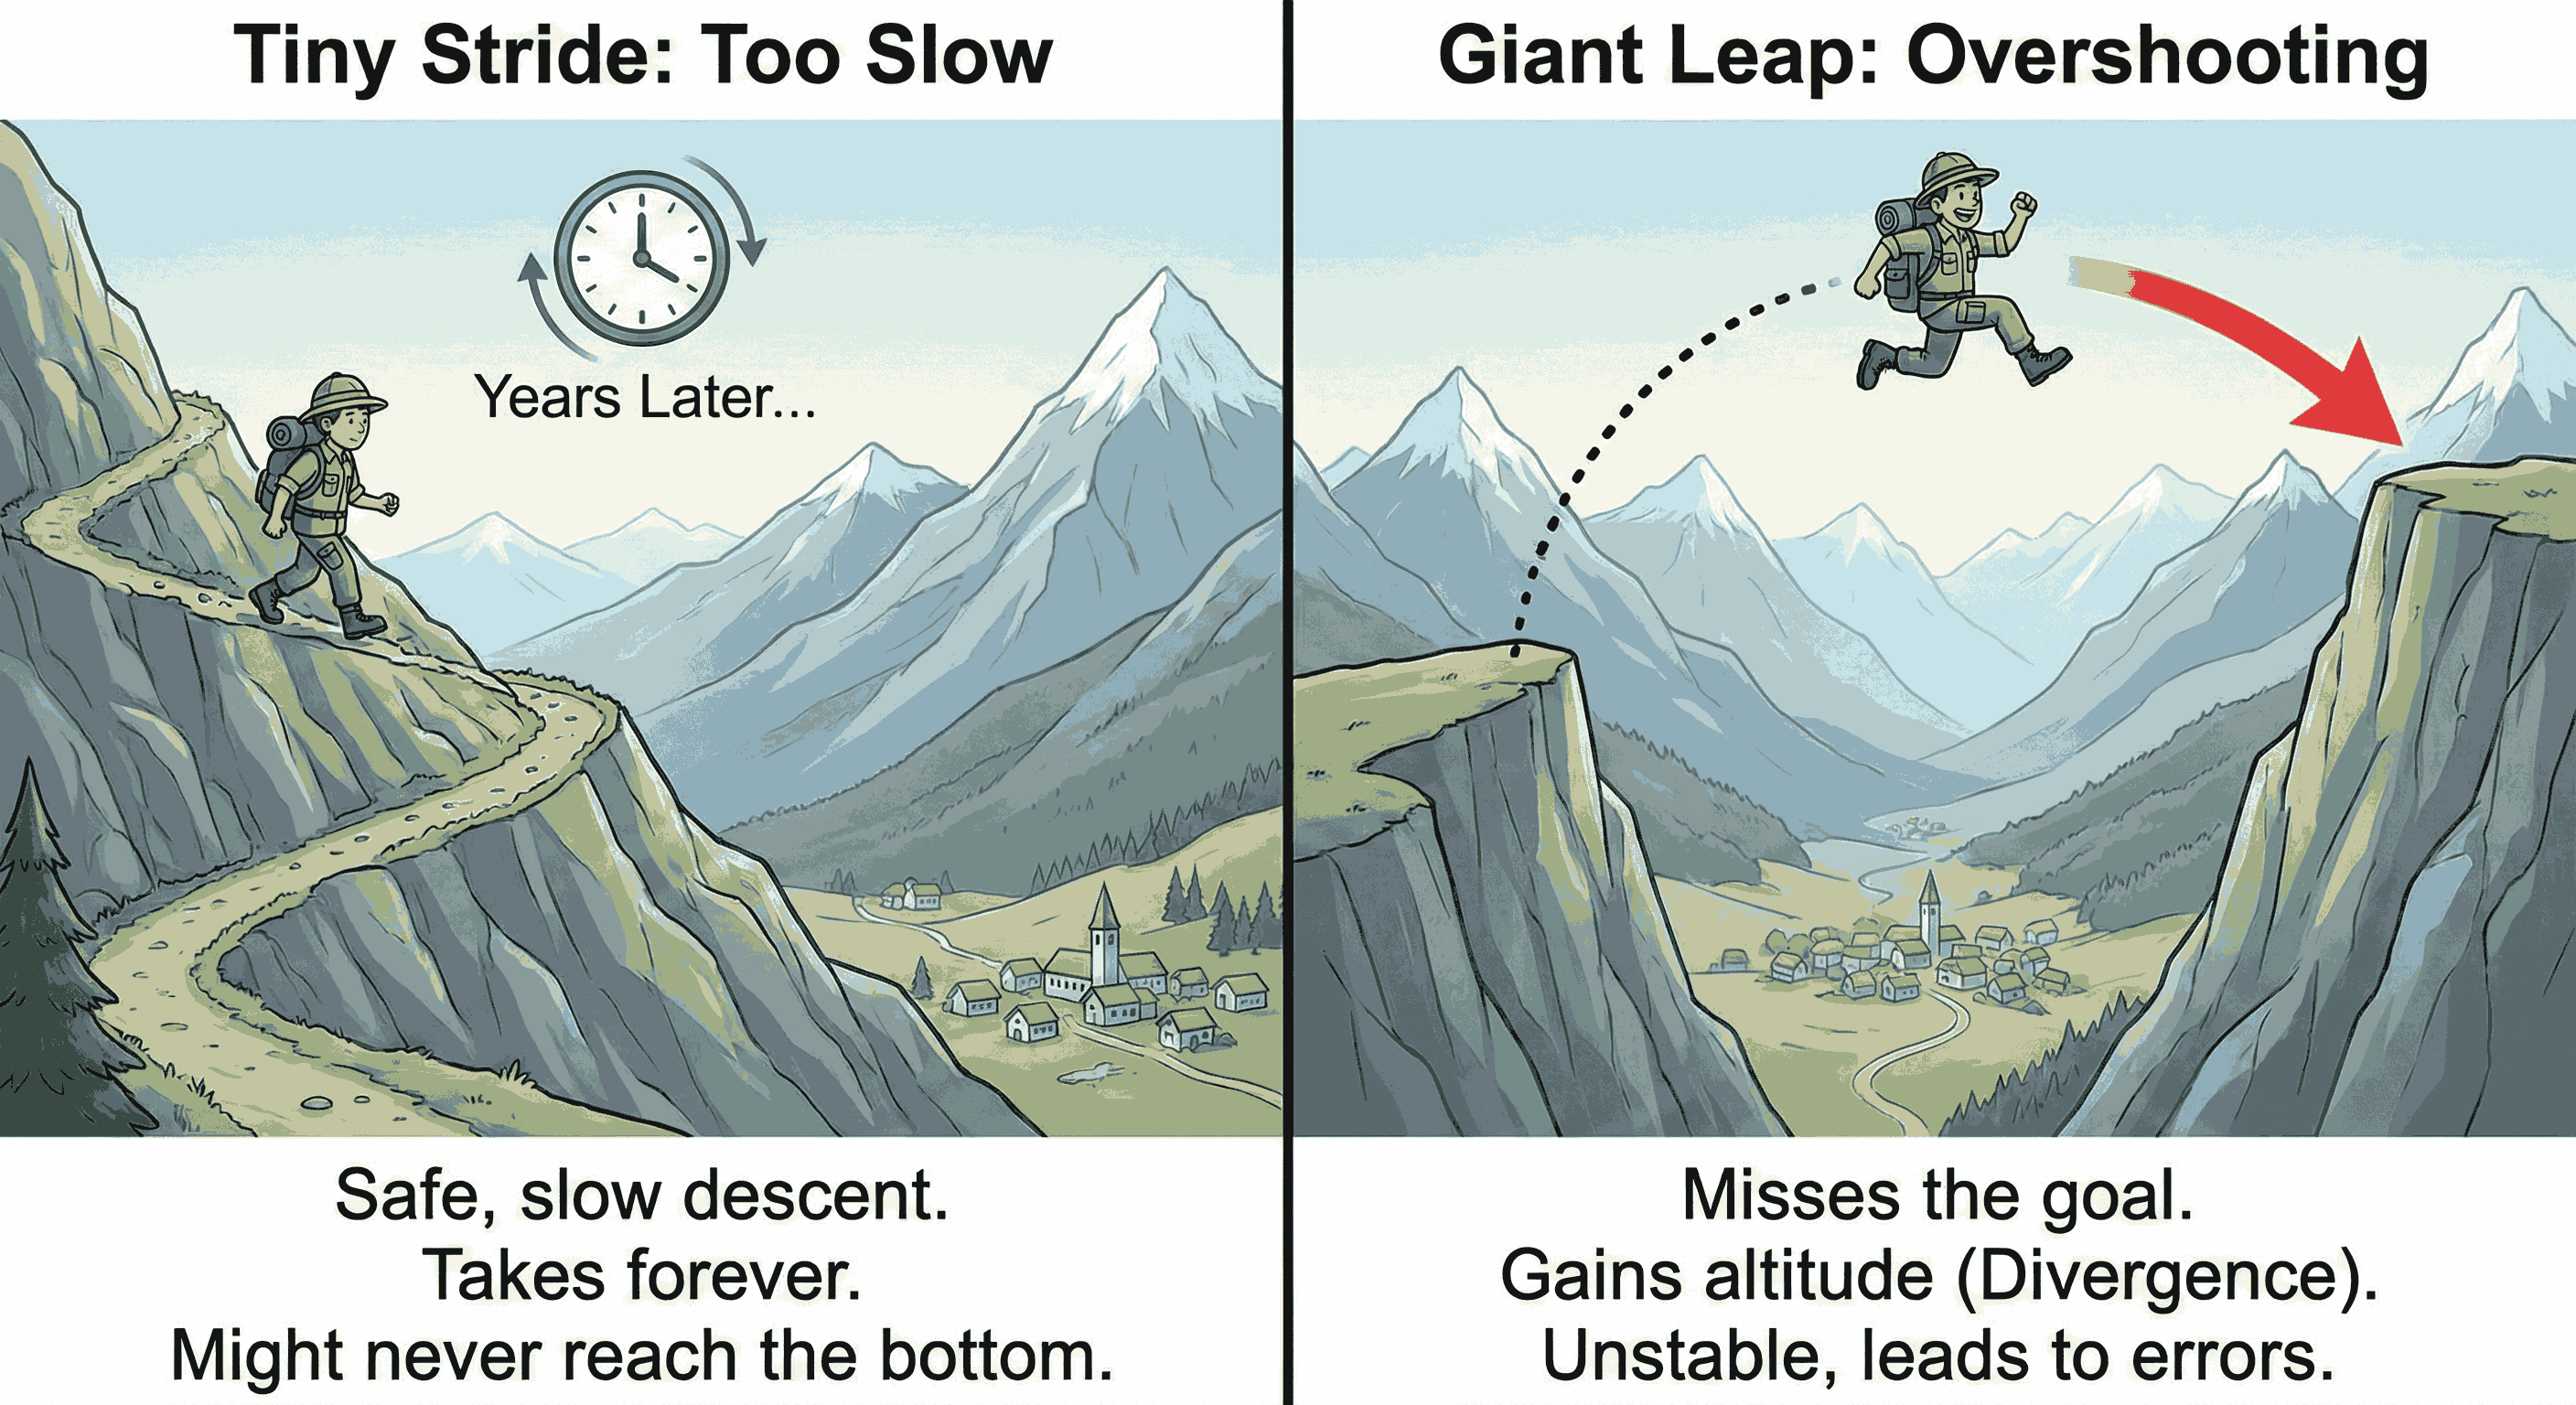

## **3. Momentum**

Standard Gradient Descent behaves like a massless particle; it has no inertia. If the gradient changes direction, the particle changes direction instantly. Momentum transforms the explorer into a "Heavy Ball" rolling down the mountain.   

When a heavy ball rolls down a ravine:

- Dampening Oscillations: As it bounces between the left and right walls, the momentum vectors in the "left" direction and "right" direction effectively cancel each other out over time. The ball doesn't instantaneously reverse; it turns slowly.

- Accumulating Speed: As the ball rolls down the gentle slope of the valley floor, the acceleration (gradient) is consistently in the same direction. The velocity vector accumulates these small pushes, causing the ball to roll faster and faster.

This allows the heavy ball to barrel down the valley floor much faster than the careful explorer who stops to check the map at every meter.   

We will implement Momentum on a 2D "ravine" function to visualize the difference in trajectory compared to vanilla Gradient Descent.

Objective: Minimize the 2D function $f(x, y) = x^2 + 10y^2$.

Gradients: $\frac{\partial f}{\partial x} = 2x$, $\frac{\partial f}{\partial y} = 20y$.

Note: The surface is 10 times steeper in the y-direction, creating a ravine aligned with the x-axis.

In [ ]:
import numpy as np #some OOM error might occur, rerun from this point
import plotly.graph_objects as go

In [ ]:


# --- 1. Ravine Function ---
def func_ravine(theta):
    x, y = theta
    return x**2 + 10 * y**2

def grad_ravine(theta):
    x, y = theta
    return np.array([2*x, 20*y])

# --- 2. Momentum Optimizer ---
def gradient_descent_momentum(start_theta, lr, momentum, iterations):
    theta = np.array(start_theta)
    velocity = np.zeros_like(theta)
    history = [theta.copy()]

    for _ in range(iterations):
        grad = grad_ravine(theta)
        velocity = momentum * velocity - lr * grad
        theta = theta + velocity
        history.append(theta.copy())

    return np.array(history)

# --- 3. Execution ---
start_pos = [10.0, 10.0]
lr = 0.05
mu = 0.9
steps = 50

path_momentum = gradient_descent_momentum(start_pos, lr, mu, steps)

# --- 4. Grid for Contour (Reduced to avoid OOM) ---
x_grid = np.linspace(-12, 12, 50)
y_grid = np.linspace(-12, 12, 50)
X, Y = np.meshgrid(x_grid, y_grid)
Z = X**2 + 10*Y**2

# --- 5. Interactive Animated Plot ---
fig = go.Figure()

# Static contour
fig.add_trace(go.Contour(
    z=Z,
    x=x_grid,
    y=y_grid,
    colorscale='Viridis',
    contours=dict(showlines=True),
    showscale=False,
    name='Ravine Surface'
))

# Initial Momentum point
fig.add_trace(go.Scatter(
    x=[path_momentum[0,0]],
    y=[path_momentum[0,1]],
    mode='markers+lines',
    marker=dict(size=10, color='red'),
    line=dict(color='red', dash='dash'),
    name='Momentum Path'
))

# Frames for animation
frames = []
for i in range(len(path_momentum)):
    x_curr, y_curr = path_momentum[i]

    # Optional: Show velocity arrow
    if i>0:
        vel_x = path_momentum[i,0] - path_momentum[i-1,0]
        vel_y = path_momentum[i,1] - path_momentum[i-1,1]
        arrow_x = [x_curr, x_curr + vel_x]
        arrow_y = [y_curr, y_curr + vel_y]
    else:
        arrow_x, arrow_y = [], []

    frames.append(go.Frame(
        data=[
            go.Contour(z=Z, x=x_grid, y=y_grid, colorscale='Viridis', showscale=False),
            go.Scatter(x=path_momentum[:i+1,0],
                       y=path_momentum[:i+1,1],
                       mode='markers+lines',
                       marker=dict(size=10,color='red'),
                       line=dict(color='red', dash='dash')),
            go.Scatter(x=arrow_x, y=arrow_y,
                       mode='lines',
                       line=dict(color='green', width=3),
                       name='Momentum Vector')
        ],
        name=str(i),
        layout=go.Layout(
            title=f'Momentum GD Step {i} | lr={lr}, mu={mu}'
        )
    ))

fig.frames = frames

# Animation controls
fig.update_layout(
    width=900,
    height=700,
    title=f'Momentum GD in Ravine (lr={lr}, mu={mu})',
    xaxis_title='x',
    yaxis_title='y',
    updatemenus=[{
        "type": "buttons",
        "buttons": [
            {"label": "Play",
             "method": "animate",
             "args": [None, {"frame": {"duration":200, "redraw": True}, "fromcurrent": True}]},
            {"label": "Pause",
             "method": "animate",
             "args": [[None], {"frame": {"duration":0, "redraw": False}}]}
        ]
    }]
)

fig.show()


## Task 3.1 :

**Comparative Analysis:** Implement a standard 2D Gradient Descent (without momentum). Run both algorithms on the function $f(x, y) = x^2 + 10y^2$ starting at $(10, 10)$ with a learning rate of $0.05$.

**Observation:** Plot the paths. The standard GD should zig-zag heavily across the Y-axis. The Momentum path should initially swing wide but then curve smoothly towards the center $(0,0)$ and accelerate along the X-axis.

**Tuning:** Try setting momentum = 0.1. Does it behave more like the heavy ball or more like standard GD? (Answer: Low momentum makes it behave like standard GD).

In [ ]:
#WRITE CODE HERE

## **4. Scalable Optimization: Stochastic Gradient Descent (SGD)**

In modern machine learning, datasets are enormous. Calculating the exact gradient involves summing the error over every single data point.$$\nabla L(\theta) = \frac{1}{N} \sum_{i=1}^{N} \nabla L_i(\theta)$$
If $N = 1,000,000$, a single step of Gradient Descent requires one million calculations. This is known as Batch Gradient Descent, and it is computationally prohibitive for large data.

**Stochastic Gradient Descent (SGD)** approximates the true gradient by calculating the gradient using only one single random data point (or a small batch) at each step.$$\theta_{t+1} = \theta_t - \gamma \nabla L_i(\theta_t)$$
Where $(x_i, y_i)$ is a random training example chosen at step $t$.

Imagine a politician wants to know the public opinion (the true gradient) to adjust their campaign strategy (the parameters).

- Batch Gradient Descent: The politician conducts a full national census, asking every citizen their opinion before making a single decision. This is accurate but takes years. By the time the decision is made, the election is over.

- Stochastic Gradient Descent: The politician asks one random person on the street and adjusts their strategy based on that single opinion. This is noisy (that person might be an outlier), but it is instant. The politician can make millions of small adjustments in the time it takes to do one census. Over time, the "random walk" of adjustments averages out to the correct strategy.

## **Updated for modern machines : Mini-Batch Gradient Descent**

In practice, we rarely use a batch size of 1. We use a Mini-Batch (e.g., 32, 64, or 128 samples). This offers a "best of both worlds" solution:

- Stability: The average gradient of 32 points is much less noisy than 1 point.

- Speed: Computing 32 gradients is much faster than 1 million.

- Hardware Efficiency: Modern GPUs are designed to process matrices (batches) of data in parallel, making a batch of 32 almost as fast to compute as a batch of 1.   

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import plotly.graph_objects as go

# --- 1. Data Generation ---
def generate_data(n_samples=100):
    np.random.seed(42)
    X = 2 * np.random.rand(n_samples, 1)
    y = 4 + 3 * X + np.random.randn(n_samples, 1)
    return X, y

# --- 2. SGD Implementation ---
def stochastic_gradient_descent(X, y, learning_rate=0.1, n_epochs=50):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(2, 1)
    path = [theta.copy()]

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
            path.append(theta.copy())

    return theta, np.array(path)

# --- 3. Execution ---
X_data, y_data = generate_data(100)
final_theta, theta_path = stochastic_gradient_descent(X_data, y_data, learning_rate=0.1, n_epochs=50)

print(f"True Params: Intercept=4, Slope=3")
print(f"Learned Params: Intercept={final_theta[0,0]:.3f}, Slope={final_theta[1,0]:.3f}")

True Params: Intercept=4, Slope=3
Learned Params: Intercept=4.335, Slope=2.437


In [ ]:
#THIS TAKES A LONG TIME TO RUN, MIGHT AS WELL ASK PROF. RAM A FEW DOUBTS
# --- 4. Interactive Animated Plot ---
fig = go.Figure()

# True minimum
fig.add_trace(go.Scatter(
    x=[4],
    y=[3],
    mode='markers',
    marker=dict(color='blue', size=10),
    name='True Minimum'
))

# Initial point
fig.add_trace(go.Scatter(
    x=[theta_path[0,0,0]],
    y=[theta_path[0,1,0]],
    mode='markers+lines',
    line=dict(color='red', dash='dash'),
    marker=dict(size=8, color='red'),
    name='SGD Path'
))

# Frames for animation
frames = []
for i in range(1, len(theta_path)):
    frames.append(go.Frame(
        data=[
            go.Scatter(
                x=theta_path[:i+1,0,0],
                y=theta_path[:i+1,1,0],
                mode='markers+lines',
                line=dict(color='red', dash='dash'),
                marker=dict(size=8, color='red')
            ),
            go.Scatter(
                x=[4],
                y=[3],
                mode='markers',
                marker=dict(color='blue', size=10)
            )
        ],
        name=str(i),
        layout=go.Layout(
            title=f"SGD Parameter Space | Iteration {i}"
        )
    ))

fig.frames = frames

# Animation controls
fig.update_layout(
    width=900,
    height=600,
    title="SGD Path in Parameter Space",
    xaxis_title=r"$\theta_0$ (Intercept)",
    yaxis_title=r"$\theta_1$ (Slope)",
    updatemenus=[{
        "type": "buttons",
        "buttons": [
            {"label": "Play",
             "method": "animate",
             "args": [None, {"frame": {"duration": 50, "redraw": True}, "fromcurrent": True}]},
            {"label": "Pause",
             "method": "animate",
             "args": [[None], {"frame": {"duration": 0, "redraw": False}}]}
        ]
    }]
)

fig.show()

## Task 4.1 : Observe

1. Noise Observation: Run the code and examine the plot. The red line should be extremely "jittery" or squiggly. Unlike the smooth curve of Gradient Descent, SGD wanders around.

2. Mini-Batch Implementation: Modify the code to sample batch_size=10 indices instead of 1. Calculate the mean gradient of these 10 points.

3. Comparison: Plot the path of SGD (Batch=1) vs Mini-Batch (Batch=10). The Mini-Batch path should be smoother and more direct, confirming the variance reduction theory.   

## **5. Constrained Optimization: Lagrange Multipliers**

This deals with problems where we must minimize a function $f(x)$ subject to certain conditions, such as $g(x) = 0$ (equality constraint) or $h(x) \le 0$ (inequality constraint).

Typical examples in machine learning include:
- Support Vector Machines (SVM): Minimize the norm of weights subject to correct classification constraints.
- Principal Component Analysis (PCA): Maximize variance subject to the basis vectors being orthogonal and unit length.

The method of Lagrange Multipliers transforms a constrained problem into an unconstrained one by introducing a new variable, $\lambda$ (lambda), called the Lagrange Multiplier.

Imagine you are hiking on a mountain. The mountain is the objective function $f(x)$ (where height = value). You want to find the highest point you can reach. However, there is a strict rule: you must stay on a specific hiking trail. The trail is the constraint $g(x)=0$.

You cannot simply walk to the summit if the trail doesn't go there. You must find the highest point on the trail.

- If the trail cuts across the contour lines of the mountain (i.e., you are walking steeply uphill or downhill), you are clearly not at the peak. You can keep walking along the trail to go higher.
- You reach the highest point on the trail when the trail runs tangent to the contour line of the mountain. At this specific point, the direction of steepest ascent (the gradient of the mountain) is perpendicular to the trail. Since the gradient of the constraint (the direction perpendicular to the trail) is also perpendicular to the trail, the two gradients are parallel (aligned).

The Lagrange Multiplier $\lambda$ simply scales the two gradients so they cancel each other out.

**Solving Constrained Problems**

Constrained optimization is numerically difficult to implement from scratch because "staying on the trail" ($g(x)=0$) exactly is hard for discrete iterative steps. Therefore, we will use the robust scipy.optimize library, which implements sophisticated algorithms like SLSQP (Sequential Least SQuares Programming).

Objective: Maximize the area of a rectangle $A = x \cdot y$ subject to the constraint that its perimeter is fixed at 20 ($2x + 2y = 20$).

*Note: We know the answer is a square ($5 \times 5$), but we will solve it numerically.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# --- 1. Define Problem ---
def objective_func(x):
    # We want to MAXIMIZE Area = x*y
    # Scipy minimizes, so we minimize -Area
    return -(x[0] * x[1])
def constraint_func(x):
    # Constraint: 2x + 2y = 20
    # Standard form: g(x) = 0 -> 2x + 2y - 20 = 0
    return 2 * x[0] + 2 * x[1] - 20
# --- 2. Setup Optimization ---
# Initial guess (start with a skinny rectangle)
x0 = [2, 8]
# Define constraint dictionary for Scipy
# 'eq' means Equality Constraint (g(x) = 0)
cons = ({'type': 'eq', 'fun': constraint_func})
# --- 3. Execute Optimization ---
# We use SLSQP method which handles constraints
solution = minimize(objective_func, x0, method='SLSQP', constraints=cons)
# --- 4. Results ---
print(f"Optimization Status: {solution.message}")
print(f"Optimal Dimensions: x={solution.x[0]:.2f}, y={solution.x[1]:.2f}")
print(f"Max Area: {-solution.fun:.2f}")

Optimization Status: Optimization terminated successfully
Optimal Dimensions: x=5.00, y=5.00
Max Area: 25.00


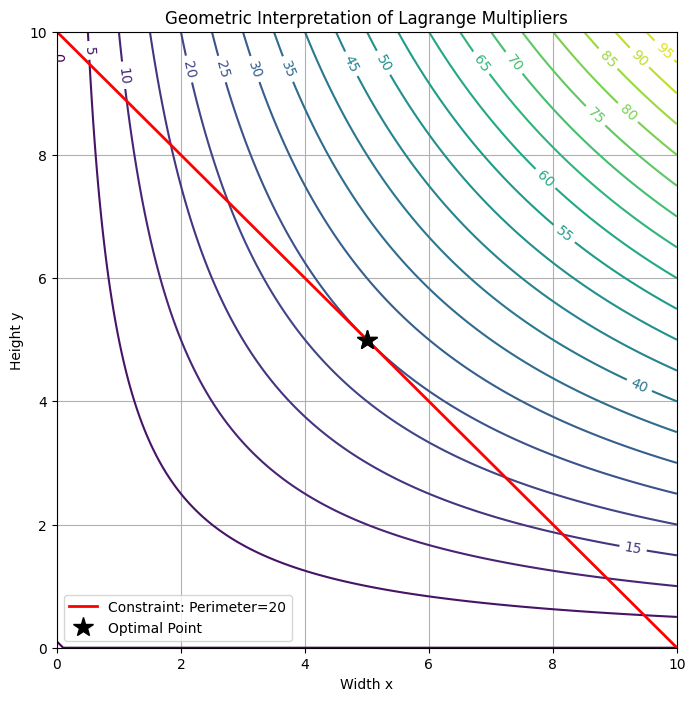

In [ ]:
# --- 5. Visualization (Geometric Intuition) ---
x_range = np.linspace(0, 10, 100)
y_range = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = X * Y # The Objective Surface (Area)

plt.figure(figsize=(8, 8))
# Plot Contour lines of Area
CS = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(CS, inline=1, fontsize=10)

# Plot the Constraint Line (2x + 2y = 20 -> y = 10 - x)
y_constraint = 10 - x_range
plt.plot(x_range, y_constraint, 'r-', linewidth=2, label='Constraint: Perimeter=20')

# Plot the Solution
plt.plot(solution.x, solution.x, 'k*', markersize=15, label='Optimal Point')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title("Geometric Interpretation of Lagrange Multipliers")
plt.xlabel("Width x")
plt.ylabel("Height y")
plt.legend()
plt.grid(True)
plt.show()

## Task 5.1:

- Constraint Modification: Change the constraint to a circle: $x^2 + y^2 = 20$. Update the constraint_func and the visualization code.

- Prediction: Before running, predict the shape of the solution. (Answer: A square is still the optimal rectangle inscribed in a circle).
- Verification: Run the code. Does the red line (now a red circle) touch the contour curves tangentially? This reinforces the universality of the geometric interpretation.

In [ ]:
#WRITE CODE HERE

## **6. Convex Optimization**

**6.1 Convex Sets and Functions**

**Convex Set:** A shape is convex if, for any two points inside the shape, the straight line connecting them is also entirely inside the shape.
- Examples: A circle, a square, a cube.
- Counter-examples: A crescent moon, a donut (the line crosses the hole).

**Convex Function:** A function is convex if a line segment connecting any two points on its graph lies above or on the graph.

- Visual: A bowl ($x^2$).
- Mathematical: $f(\alpha x + (1-\alpha)y) \le \alpha f(x) + (1-\alpha)f(y)$ for $\alpha \in $.

**The Fundamental Theorem:**

For a convex function defined on a convex set, any local minimum is also the global minimum.This property is profoundly important.

It means that if you are optimizing a convex problem (like Logistic Regression or SVMs) and your gradient becomes zero, you can stop immediately. You have found the absolute best solution. You do not need to worry about being stuck in a sub-optimal valley, because there are no sub-optimal valleys; there is only one global valley floor.

**6.2 Linear and Quadratic Programming**

Two major subclasses of convex optimization are vital in operations research and machine learning:
1. Linear Programming (LP): The objective function is linear, and the constraints are linear inequalities. The feasible region is a convex polygon. The solution always lies at one of the vertices (corners) of the polygon.

2. Quadratic Programming (QP): The objective function is quadratic (convex), and the constraints are linear. This is the exact form of the Support Vector Machine (SVM) optimization problem. The SVM objective (minimize $\|w\|^2$) is a convex bowl, and the constraints (classify data points correctly) form linear fences cutting through that bowl.

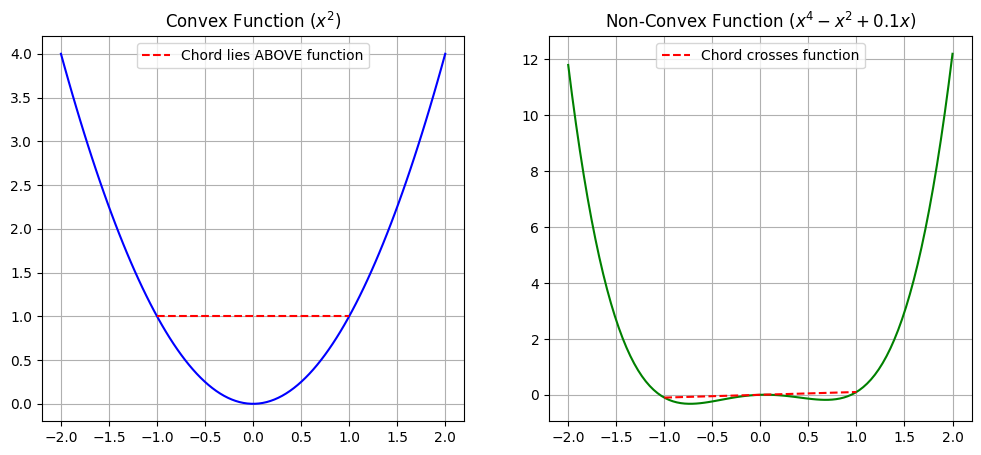

In [ ]:
#Visually distinguish between convex and non-convex functions to understand why convexity is desirable.

def plot_convexity():
    x = np.linspace(-2, 2, 100)

    # Convex Function: f(x) = x^2
    y_convex = x**2

    # Non-Convex Function: g(x) = x^4 - x^2 + 0.1*x
    # (A wavy function with two dips)
    y_nonconvex = x**4 - x**2 + 0.1*x

    plt.figure(figsize=(12, 5))

    # Plot 1: Convex
    plt.subplot(1, 2, 1)
    plt.plot(x, y_convex, 'b-')
    plt.title("Convex Function ($x^2$)")
    # Draw a chord to prove convexity
    plt.plot([-1, 1],[1,1] , 'r--', label='Chord lies ABOVE function')
    plt.legend()
    plt.grid(True)

    # Plot 2: Non-Convex
    plt.subplot(1, 2, 2)
    plt.plot(x, y_nonconvex, 'g-')
    plt.title("Non-Convex Function ($x^4 - x^2 + 0.1x$)")
    # Draw a chord to prove non-convexity
    plt.plot([-1, 1], [(-1)**4 - (-1)**2 - 0.1, 1**4 - 1**2 + 0.1], 'r--', label='Chord crosses function')
    plt.legend()
    plt.grid(True)

    plt.show()

plot_convexity()

## Task 6.1:

- Visual Identification: Run the code. Notice how the red dashed line (the chord) sits comfortably inside the "bowl" of the convex function.

- Chord Violation: Notice how on the right, the red line cuts through the "hill" in the middle of the W-shape. This crossing proves the function is non-convex.

- Optimization Consequence: Mentally initialize a ball at $x=0$ on both graphs.On the left (convex), the ball rolls to the only minimum.On the right (non-convex), the ball at $x=0$ is balanced on a local maximum.
  - If pushed slightly left, it falls into one valley.
  - If pushed right, it falls into a different valley.

This illustrates the initialization sensitivity of non-convex problems (like Neural Networks).

In [ ]:
#WRITE CODE HERE